In [5]:
import speech_recognition as sr

def transcribe(filename, basename, mechs=None, seconds=11):
    if not mechs:
        print("No transcription mechanisms specified, skipping")
        return
    if not os.path.exists(filename):
        print("Audio input file does not exist, skipping")
        return

    w = None
    
    try:
        w = wave.open(filename, 'r')
        start_frame = 0
        length = w.getnframes()
        block_size = w.getframerate() * seconds # 11 seconds (default) recognition snippets
        overlap = w.getframerate()    *  1      #  1 second overlap between blocks
        asr= w.getframerate() 
        lastframeend = start_frame

        for m in mechs:
            m.start(basename)

        while lastframeend < w.getnframes()-1:
            start = max(0, lastframeend - overlap)
            end = min(lastframeend + block_size, w.getnframes()-1)
            lastframeend = end + 1
            print("Processing frame {start} (second {ssec} ) to frame {end} (second {esec} )".format(start=start, ssec=start/asr, end=end, esec=end/asr))
            w.setpos(start) # Set position on the original wav file
            chunkData = w.readframes(end-start) # And read to where we need

      # Create temporary file containing snippet of audio for processing  
            chunkAudio = None
            tempfile = 'temp.wav'
            try: 
                chunkAudio = wave.open(tempfile,'w')
                chunkAudio.setnchannels(w.getnchannels())
                chunkAudio.setsampwidth(w.getsampwidth())
                chunkAudio.setframerate(w.getframerate())
                chunkAudio.writeframes(chunkData)
            finally:
                if chunkAudio:
                    chunkAudio.close()

            timecode = int(start / w.getframerate())
            timecode = "[%02d:%02d] " % (int(timecode / 60), timecode % 60)

            for m in mechs:
                m.recognize(tempfile, timecode)
 
    finally:
        if w:
            w.close()
        
        for m in mechs:
            m.done()
        print("All done.")
    
    

In [2]:

    
    
class transcribe_sphinx():
    def __repr__(self):
        return "Sphinx"
    
    def done(self):
        if self.output_file:
            self.output_file.close()
            self.output_file = None

    def __init__(self, options):
        self.recognizer = sr.Recognizer()
        self.language = 'en-US'
        self.output_file = None

    def start(self, basename):
        self.done()
        outname = basename + '_sphinx.txt'
        self.output_file = open(outname, 'wt')
        print("Writing sphinx transcription to {0}".format(outname))

    def recognize(self, tempfile, timecode):
        with sr.AudioFile(tempfile) as source:
            audio = self.recognizer.record(source) # read the snippet file
    # recognize speech using Sphinx
        try:
            recognized = self.recognizer.recognize_sphinx(audio, language='en-US')
            self.output_file.write(timecode)
            self.output_file.write(recognized )
            
        except sr.UnknownValueError:
              print("Sphinx could not understand audio")
        except sr.RequestError as e:
              print("Sphinx error: {0}".format(e))

            

In [3]:
import os
import os
import string
import sys
import time
import wave

f='/home/bigdata/scripts/DEMO_AUDIO_TEXT/ZOOM0017.WAV'
basename='transcr'
mechs = []
mechs.append(transcribe_sphinx(''))
transcribe(f, basename, mechs=mechs, seconds=20)

Writing sphinx transcription to transcr_sphinx.txt
Processing frame 0 (second 0.0 ) to frame 882000 (second 20.0 )
Processing frame 837901 (second 19.00002267573696 ) to frame 1764001 (second 40.000022675736965 )
Processing frame 1719902 (second 39.00004535147392 ) to frame 1830463 (second 41.50709750566894 )
All done.


In [9]:

r = sr.Recognizer()
with sr.AudioFile('bbcout.wav') as source:
    audio = r.record(source)  # read the entire audio file
 
# recognize speech using Sphinx
try:
    
    #transcr=(r.recognize_sphinx(audio))
    transcr=(r.recognize_google(audio))
    print(transcr)
except sr.UnknownValueError:
    print("Sphinx could not understand audio")
except sr.RequestError as e:
    print("Sphinx error; {0}".format(e))

Sphinx error; recognition connection failed: [Errno 32] Broken pipe


In [4]:
!cat bbc_sphinx.txt





[00:00] i think hank said that era son of just try to think about chieftains war and came to him and run for things to him than he needs and to the center for with c.[00:19] oh it seemed to be shameful that simi h. i. v. any yeah cut it faith in continuing one fact that female fung half of paying think now that that can i respond to there[00:39] hit her time in bed for damn them place you have made to wipe it came in and shut it th won't i seem to think this instructions have been wonderful[00:59] and finland walton's that he can beat him temptation man had the cheetah codification degraded whoa now have haiti's a mandate he yes i have not afraid that[01:19] to have him one faith and continue to i didn't say that folks get the time i'm chief he has he's asked me if the peace he hesitates i think that[01:39] i spent a half yeah and have gone up five over eighty if he's eighty cfo and i have got affairs p. c. s. c. c. never had not test case when it mean the me he he hurts him as an ange

In [5]:
import re
INFILE='bbc_sphinx.txt'
OUTFILE='0bbc_sphinx.txt'

with open(INFILE, 'r') as f:
    text = f.read()

with open(OUTFILE, 'w') as f:
    f.write(re.sub('\[', '\n'+'[', text))




In [6]:
!cat 0bbc_sphinx.txt


[00:00] what's in the news from bbc learning english dot com according to ecologists having a personality means showing a consistent pattern of behavior that i'm receptionist community there is an unsteady colonies of rock and sit across the western u. s. was by following him in the wild and by taking call colonies back to the lab
[00:19] the lab i found that certain risky behaviors like forging what grief of food and responding aggressively to a threat went to get up and colonies for the north tended to take more of these risks the study suggests those more adventurous personalities would be an adaptation to the limited window of activity best by the long snowing golden winter
[00:39] so

In [72]:
from pydub import AudioSegment
import pydub
from pydub.silence import split_on_silence, detect_silence


sound_file = AudioSegment.from_wav("output.wav")

print (detect_silence(sound_file, silence_thresh=sound_file.dBFS-1, min_silence_len=3000))



[[2017, 11235], [16815, 21581], [23163, 28314], [28879, 32066], [32710, 40255]]


In [76]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
#from dtw import dtw
from numpy.linalg import norm


#Loading audio files
y1, sr1 = librosa.load('output.wav') 
y2, sr2 = librosa.load('filtered.wav') 

#Showing multiple plots using subplot
plt.subplot(1, 2, 1) 
mfcc1 = librosa.feature.mfcc(y1,sr1)   #Computing MFCC values
librosa.display.specshow(mfcc1)

plt.subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(y2, sr2)
librosa.display.specshow(mfcc2)




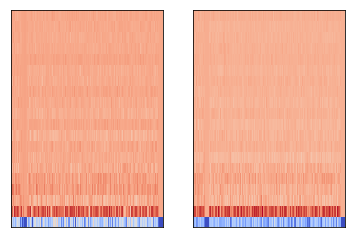

In [77]:
plt.show()